<a href="https://colab.research.google.com/github/QQmberling/neural-network-chessboard/blob/main/1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import cv2 as cv
import numpy as np
import time
import zipfile

import keras
import matplotlib.pyplot as plt
from google.colab import output, drive
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, Activation
from keras.layers import MaxPooling2D, Dropout, BatchNormalization
from sklearn.model_selection import train_test_split

In [ ]:
drive.mount('/content/gdrive')
DATASET_PATH = '/content/gdrive/My Drive/idchess_zadanie.zip'
zip_object = zipfile.ZipFile(file = DATASET_PATH,mode = 'r')
DATASET = 'Dataset/'
zip_object.extractall('./Dataset')
zip_object.close

Mounted at /content/gdrive


<bound method ZipFile.close of <zipfile.ZipFile filename='/content/gdrive/My Drive/idchess_zadanie.zip' mode='r'>>

In [ ]:
def extract_numpys(DATASET_PATH):
    X_train = np.load(f'{DATASET_PATH}xtrain.npy')
    y_train = np.load(f'{DATASET_PATH}ytrain.npy')
    X_test = np.load(f'{DATASET_PATH}xtest.npy')
    return X_train, y_train, X_test
  
X_train, y_train, X_test = extract_numpys(DATASET)


[0.3205729  0.04381185 0.24557291 0.87129277 0.89140624 0.8949569
 0.80043405 0.06518589]


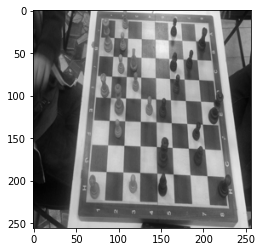

In [68]:
img = X_train[1]
img = img[:, :, 0]
img.shape
plt.imshow(img, cmap='gray')
print(y_train[1])

In [ ]:
model = Sequential()

model.add(Conv2D(1, (7, 7), input_shape = (256, 256, 1), activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (3, 3)))
model.add(Conv2D(4, (5, 5), activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (3, 3)))

model.add(Conv2D(16, (3, 3), activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (3, 3)))

model.add(Flatten())

# model.add(Dense(units = 128, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 8, activation = 'sigmoid'))

adam = Adam(learning_rate = 0.001)
model.compile(optimizer = 'rmsprop', loss = 'MSE', metrics=['mae'])

In [ ]:
epochs = 10
batch_size = 150

In [53]:
start_time = time.clock()

model.fit(x = X_train, y = y_train, epochs=epochs)

end_time = time.clock()

print(end_time - start_time, 'seconds')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """Entry point for launching an IPython kernel.


Epoch 1/10
474/474 [==============================] - 554s 1s/step - loss: 0.0152 - mae: 0.0935
Epoch 2/10
474/474 [==============================] - 551s 1s/step - loss: 0.0030 - mae: 0.0409
Epoch 3/10
474/474 [==============================] - 558s 1s/step - loss: 0.0011 - mae: 0.0260
Epoch 4/10
474/474 [==============================] - 535s 1s/step - loss: 8.1202e-04 - mae: 0.0219
Epoch 5/10
474/474 [==============================] - 527s 1s/step - loss: 6.1926e-04 - mae: 0.0189
Epoch 6/10
474/474 [==============================] - 524s 1s/step - loss: 5.2464e-04 - mae: 0.0174
Epoch 7/10
474/474 [==============================] - 533s 1s/step - loss: 4.6961e-04 - mae: 0.0164
Epoch 8/10
474/474 [==============================] - 535s 1s/step - loss: 4.3392e-04 - mae: 0.0156
Epoch 9/10
474/474 [==============================] - 534s 1s/step - loss: 4.0213e-04 - mae: 0.0150
Epoch 10/10
474/474 [==============================] - 545s 1s/step - loss: 3.8800e-04 - mae: 0.0147
9510.805083

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """


In [54]:
from tensorflow.keras.models import save_model, load_model
filepath = '/content/gdrive/My Drive/5555'
save_model(model, filepath)

INFO:tensorflow:Assets written to: /content/gdrive/My Drive/5555/assets


# Результаты работы сети на тестовых изображениях

In [55]:
samples_to_predict = []
for i in range(len(X_test)):
  x = X_test[i]
  samples_to_predict.append(x)

samples_to_predict = np.array(samples_to_predict)
predictions = model.predict(samples_to_predict)



In [70]:
def draw_points(data, plt):
    for i in range(0, 8, 2):
        #print(f'Рисую {data[i]}{data[i+1]}')
        plt.scatter(x=data[i], y=data[i+1], marker='o', c='r', edgecolor='b')

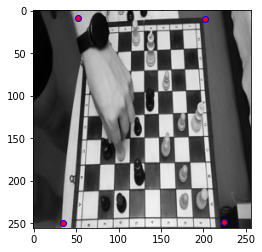

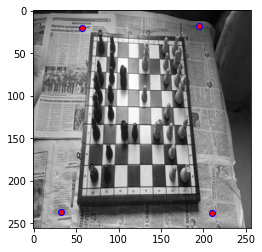

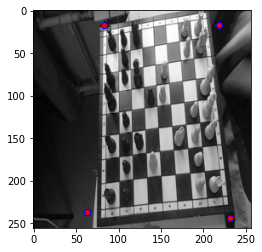

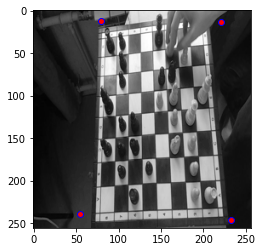

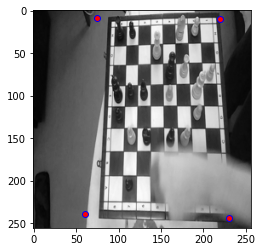

In [72]:
for point_num in range(len(X_test)):
    img = X_test[point_num]
    img = img[:, :, 0]
    plt.figure()
    plt.imshow(img, cmap='gray')
    draw_points(256*predictions[point_num], plt)